# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- umap-learn 0.5.3

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data[:400]
y = digits.target[:400]

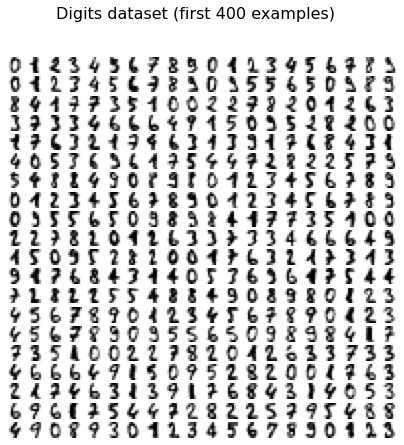

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=20, ncols=20, figsize=(7, 7))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Digits dataset (first 400 examples)", fontsize=16)

In [3]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots(figsize=(8, 8))
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 2e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i] 
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")


Ver más configuraciones de scatter en https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


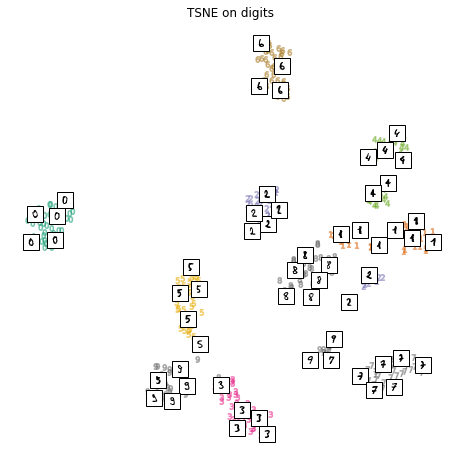

In [4]:
from sklearn.manifold import TSNE

tsne_embed = TSNE(n_components=2, perplexity = 20, n_iter=500, n_iter_without_progress=150, n_jobs=10)
projection = tsne_embed.fit_transform(X, y)
plot_embedding(projection, 'TSNE on digits')
plt.show()

The perplexity is related to the number of nearest neighbors. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Def.= 30.

Ver más configuraciones en https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

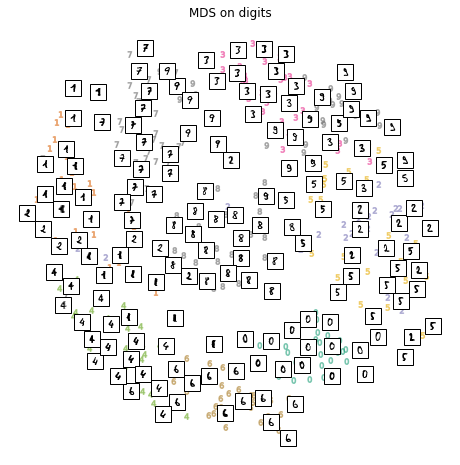

In [5]:
from sklearn.manifold import MDS

mds_embed = MDS(n_components=2, max_iter=500, n_jobs=10)
projection = mds_embed.fit_transform(X, y)
plot_embedding(projection, 'MDS on digits')
plt.show()

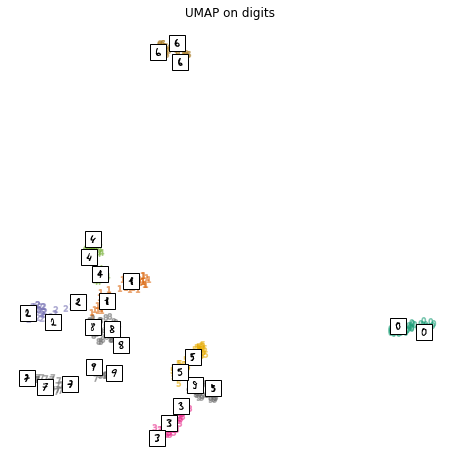

In [6]:
import umap.umap_ as umap

umap_2d = umap.UMAP(n_components = 2, min_dist = 0.3, n_neighbors= 20, n_jobs=10)
projection = umap_2d.fit_transform(X)
plot_embedding(projection, 'UMAP on digits')
plt.show()

- low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture)
- low values of min_dist will result in clumpier embeddings, i.e. to represent a finer topological structure (def.: 0.1)

Ver documentación sobre UMAP en: https://umap-learn.readthedocs.io/en/latest/index.html

# Faces

In [7]:
faces = datasets.fetch_olivetti_faces()

In [8]:
print(faces.data.shape)
print(faces.target)

(400, 4096)
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32

In [9]:
X = faces.data
y = faces.target

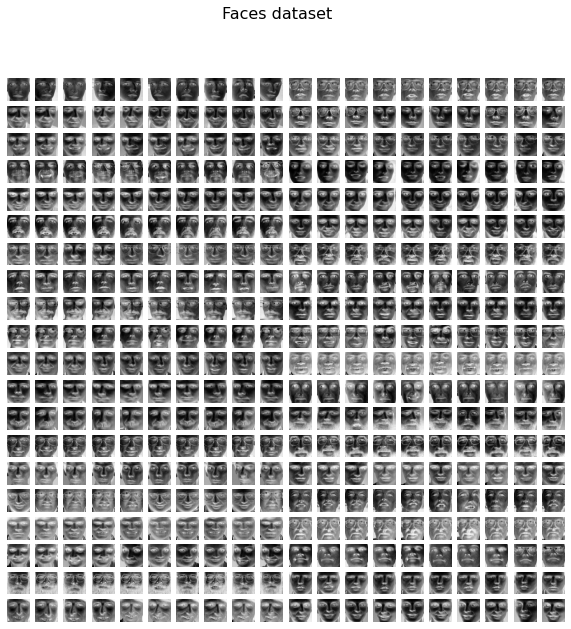

In [10]:
fig, axs = plt.subplots(nrows=20, ncols=20, figsize=(10, 10))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((64, 64)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Faces dataset", fontsize=16)

In [11]:
faces['target_names'] = np.unique(faces.target)

In [12]:
def plot_face_embedding(X, title):
    _, ax = plt.subplots(figsize=(12, 12))
    X = MinMaxScaler().fit_transform(X)

    for face in faces.target_names:
        ax.scatter(
            *X[y == face].T,
            marker=f"${face}$",
            color=plt.cm.Dark2(face),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every face on the embedding
        # show an annotation box for a group of faces
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(faces.images[i], cmap=plt.cm.gray_r), X[i] 
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


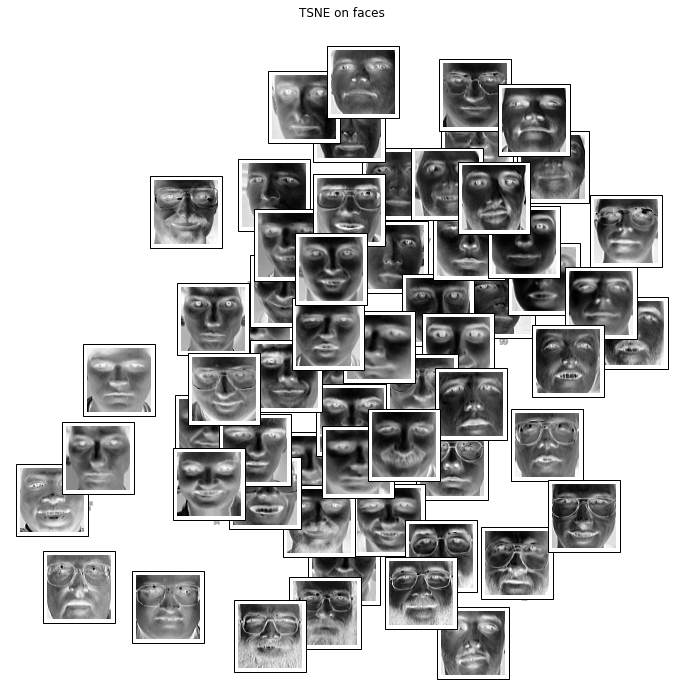

In [13]:
tsne_embed_faces = TSNE(n_components=2, perplexity = 10.0, n_iter=5000, n_iter_without_progress=150, n_jobs=10)
projection = tsne_embed_faces.fit_transform(X, y)
plot_face_embedding(projection, 'TSNE on faces')
plt.show()

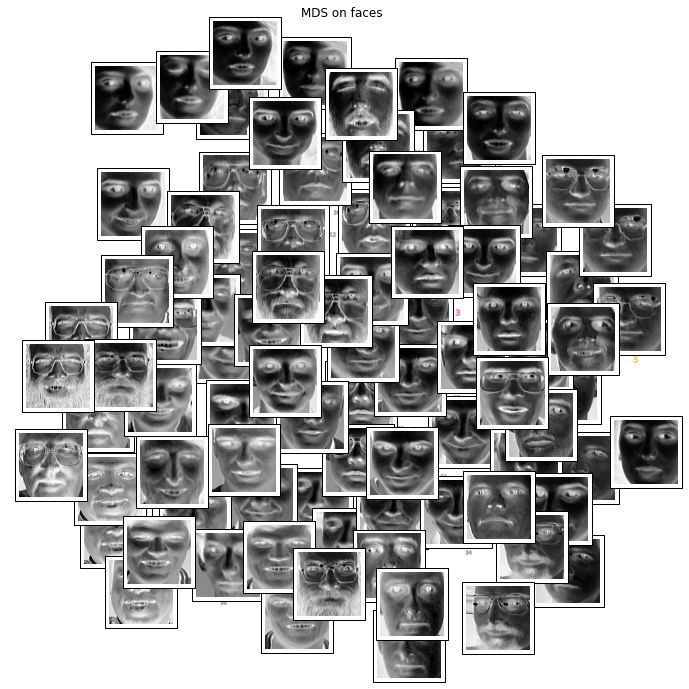

In [14]:
mds_embed = MDS(n_components=2, max_iter=500, n_jobs=10)
projection = mds_embed.fit_transform(X, y)
plot_face_embedding(projection, 'MDS on faces')
plt.show()

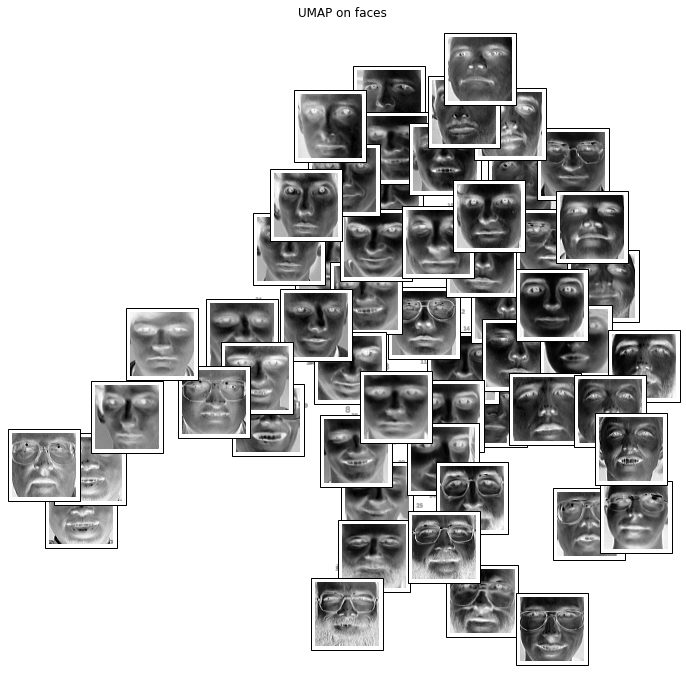

In [18]:
umap_2d = umap.UMAP(n_components = 2, min_dist = 0.1, n_neighbors= 20, n_jobs=10)
projection = umap_2d.fit_transform(X)
plot_face_embedding(projection, 'UMAP on faces')
plt.show()